In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

data = pd.read_csv('tracks7.csv')
hyper_opt = False

#split into trainval and test
trainx, testx, trainy, testy = train_test_split(data[features_for_mood], data['mood'], test_size = 0.33,
                                                random_state = 42, stratify=data['mood'])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

cv score: 0.6933032258064517


In [36]:
from sklearn.model_selection import cross_validate

In [37]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [38]:
results

{'fit_time': array([0.34909177, 0.37741184, 0.38939142, 0.37444282, 0.33490586]),
 'score_time': array([0.00100017, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.744     , 0.728     , 0.776     , 0.64516129, 0.7016129 ]),
 'train_score': array([0.72289157, 0.7248996 , 0.7188755 , 0.75551102, 0.72745491])}

In [39]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [40]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.6710097719869706

In [41]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [42]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['mood'].unique().tolist())

In [43]:
labels = data['mood'].unique().tolist()
import csv
print(test_preds)
with open('Predictions.csv', 'w', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = '\n')
    my_writer.writerow(test_preds)

[3 4 1 1 4 1 0 0 1 1 0 4 3 1 3 4 1 3 1 1 2 1 4 2 3 2 3 3 3 2 4 0 4 3 4 1 3
 1 1 4 1 0 4 4 2 3 1 3 0 1 1 2 4 0 1 1 2 2 1 3 1 0 1 0 1 2 1 4 1 4 4 4 4 0
 1 3 4 3 4 1 1 1 0 4 2 2 3 3 1 1 4 2 3 1 0 1 0 1 1 2 1 0 0 0 1 4 0 4 0 0 1
 1 2 3 3 1 1 1 4 4 2 0 1 3 3 1 4 2 1 1 1 0 2 2 1 4 4 0 4 1 1 3 4 0 1 3 3 3
 3 4 3 1 1 0 4 3 4 2 3 4 2 2 1 1 1 2 4 3 3 1 0 3 1 0 4 4 1 4 3 0 4 4 4 3 4
 2 4 2 3 4 3 1 3 4 1 0 4 1 3 0 4 3 1 1 3 0 3 4 1 4 4 1 0 1 1 2 1 3 0 4 2 1
 3 1 4 0 4 0 4 3 0 3 4 1 1 2 0 2 1 4 4 1 4 3 2 3 4 2 4 4 3 3 4 4 3 1 3 4 3
 3 3 4 3 0 1 4 4 4 1 2 4 1 0 3 1 4 0 0 3 3 1 3 4 1 1 2 2 1 3 1 4 3 2 0 3 2
 3 0 1 0 3 2 4 0 4 2 2]


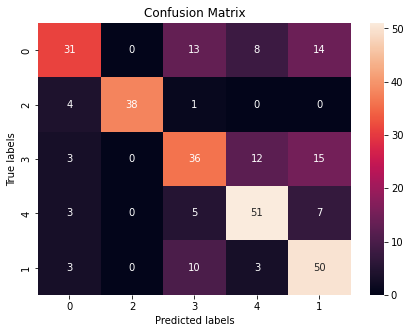

In [44]:
plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()